In [ ]:
!pip install statsmodels
!pip install openpyxl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import tree
from sklearn.tree import plot_tree
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
food_loss = pd.read_csv("FAO_food_loss_2000_2021.csv")
food_loss

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,reference.1,reference.2
0,104,Myanmar,NaN,142,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,FAO Sources,FAO Sources
1,104,Myanmar,NaN,142,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,FAO Sources,FAO Sources
2,104,Myanmar,NaN,142,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,FAO Sources,FAO Sources
3,104,Myanmar,NaN,142,"Groundnuts, excluding shelled",2006,5.40,5.40%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,FAO Sources,FAO Sources
4,104,Myanmar,NaN,142,"Groundnuts, excluding shelled",2005,5.00,5%,51970,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,FAO Sources,FAO Sources
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27768,894,Zambia,NaN,118,Millet,2000,1.27,1.27,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,NaN,NaN
27769,894,Zambia,NaN,118,Millet,2000,2.50,2.5,NaN,Winnowing,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,NaN,NaN
27770,894,Zambia,NaN,118,Millet,2000,1.00,1,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN,NaN,NaN
27771,894,Zambia,NaN,118,Millet,2000,2.38,2.38,NaN,Storage,Storage,NaN,NaN,NaN,Modelled Estimates,NaN,NaN,NaN


In [ ]:
filtered_food = food_loss[food_loss["country"].isin(["United States of America"])]
filtered_food = filtered_food[filtered_food["commodity"].isin(['Grapes', 'Apples', 'Oranges'])]
filtered_food.drop(['country', 'm49_code', 'region', 'cpc_code', 'treatment', \
'loss_percentage_original','loss_quantity', 'activity','cause_of_loss', 'sample_size', \
'method_data_collection', 'food_supply_stage', 'reference', 'reference.1', 'reference.2'], axis = 1, inplace = True)
filtered_food.groupby(['commodity','year']).mean().reset_index()
filtered_food

,commodity,year,loss_percentage
24537,Grapes,2018,9.0
24538,Apples,2018,4.0
24591,Oranges,2018,14.8
24592,Grapes,2018,8.7
24593,Apples,2018,19.2
24647,Grapes,2017,9.0
24648,Apples,2017,4.0
24708,Grapes,2016,9.0
24709,Apples,2016,4.0
24770,Grapes,2015,9.0


In [ ]:
data = pd.read_excel('142 ppi.xlsx', engine='openpyxl')

df = pd.DataFrame(data)
df = df.drop(['% chg.\nOCT ê'], axis=1)

ppi = pd.melt(df, id_vars=['type of fruit', 'Year'], var_name='Month', value_name='ppi')
ppi = ppi[ppi['type of fruit'] != 'Rome Apples']

ppi['type of fruit'].mask(ppi['type of fruit'].str.contains('Apples'), 'Apples', inplace=True)
ppi['type of fruit'].mask(ppi['type of fruit'].str.contains('Oranges'), 'Oranges', inplace=True)
ppi['type of fruit'].mask(ppi['type of fruit'].str.contains('Grapes'), 'Grapes', inplace=True)

ppi = ppi.groupby(['type of fruit', 'Year']).mean().reset_index()

ppi = ppi[['type of fruit', 'Year', 'ppi']]
ppi

,type of fruit,Year,ppi
0,Apples,2019,186.481818
1,Apples,2020,165.195556
2,Apples,2021,199.181395
3,Apples,2022,209.907317
4,Apples,2023,256.502778
5,Grapes,2019,135.985714
6,Grapes,2020,135.340000
7,Grapes,2021,161.147833
8,Grapes,2022,146.748400
9,Grapes,2023,209.169000


In [ ]:
rainfall = pd.read_csv('fixed_rainfall')
rainfall['Year'] = pd.to_datetime(rainfall['Combined'], format='%m/%Y').dt.year
rainfall = rainfall.drop(['Unnamed: 0', 'Combined'], axis=1)
rainfall = rainfall.groupby(['Year', 'State', 'TimeZone']).sum().reset_index()
rainfall

,Year,State,TimeZone,Precipitation(in)
0,2016,AL,US/Central,2.017438
1,2016,AR,US/Central,2.627630
2,2016,AZ,US/Mountain,0.620624
3,2016,CA,US/Mountain,0.704471
4,2016,CA,US/Pacific,0.892885
...,...,...,...,...
436,2022,VT,US/Eastern,1.080322
437,2022,WA,US/Pacific,0.827536
438,2022,WI,US/Central,0.812354
439,2022,WV,US/Eastern,1.255668


In [ ]:
rainppi = rainfall.merge(ppi, how = 'inner', on = 'Year')
rainppi

,Year,State,TimeZone,Precipitation(in),type of fruit,ppi
0,2019,AL,US/Central,1.610546,Apples,186.481818
1,2019,AL,US/Central,1.610546,Grapes,135.985714
2,2019,AL,US/Central,1.610546,Oranges,163.800000
3,2019,AR,US/Central,1.776430,Apples,186.481818
4,2019,AR,US/Central,1.776430,Grapes,135.985714
...,...,...,...,...,...,...
751,2022,WV,US/Eastern,1.255668,Grapes,146.748400
752,2022,WV,US/Eastern,1.255668,Oranges,234.411765
753,2022,WY,US/Mountain,0.283656,Apples,209.907317
754,2022,WY,US/Mountain,0.283656,Grapes,146.748400


In [ ]:
food_waste = pd.read_excel("food waste.xlsx")
food_waste

,Year,Primary weight2,Loss from primary to retail weight,Retail weight,Loss from retail/ institutional to consumer level,Consumer weight,Nonedible share,Edible weight,Other (cooking loss and uneaten food),Fruit
0,1970,16.087066,3.0,15.604454,11.569652,13.799073,27,10.073323,36,Fresh Oranges
1,1971,15.689441,3.0,15.218758,11.569652,13.458000,27,9.824340,36,Fresh Oranges
2,1972,14.414710,3.0,13.982269,11.569652,12.364569,27,9.026135,36,Fresh Oranges
3,1973,14.350594,3.0,13.920076,11.569652,12.309572,27,8.985987,36,Fresh Oranges
4,1974,14.352432,3.0,13.921859,11.569652,12.311148,27,8.987138,36,Fresh Oranges
...,...,...,...,...,...,...,...,...,...,...
152,2017,8.274792,9.0,7.530061,8.738959,6.872012,4,6.597132,33,Fresh Grapes
153,2018,8.104412,9.0,7.375015,8.738959,6.730516,4,6.461295,33,Fresh Grapes
154,2019,8.423683,8.9,7.673975,8.738959,7.003349,4,6.723215,33,Fresh Grapes
155,2020,8.217024,9.1,7.469275,8.738959,6.816538,4,6.543877,33,Fresh Grapes


In [ ]:
#limiting the food waste statistics to 2019 and upwards

food_waste = food_waste[food_waste['Year'] >= 2019]
food_waste["Fruit"] = food_waste["Fruit"].str[6:]
food_waste

,Year,Primary weight2,Loss from primary to retail weight,Retail weight,Loss from retail/ institutional to consumer level,Consumer weight,Nonedible share,Edible weight,Other (cooking loss and uneaten food),Fruit
49,2019,8.458670,3.0,8.204910,14.801459,6.990463,27,5.103038,36,Oranges
50,2020,9.400705,3.0,9.118684,14.801459,7.768985,27,5.671359,36,Oranges
51,2021,8.146108,3.0,7.901724,14.801459,6.732154,27,4.914472,36,Oranges
52,2022,8.247954,3.0,8.000516,14.801459,6.816323,27,4.975916,36,Oranges
102,2019,17.672227,4.0,16.965338,19.165822,13.713791,10,12.342412,20,Apples
103,2020,16.267342,4.0,15.616648,19.165822,12.623589,10,11.361230,20,Apples
104,2021,15.813601,4.0,15.181057,19.165822,12.271483,10,11.044335,20,Apples
154,2019,8.423683,8.9,7.673975,8.738959,7.003349,4,6.723215,33,Grapes
155,2020,8.217024,9.1,7.469275,8.738959,6.816538,4,6.543877,33,Grapes
156,2021,8.495761,9.0,7.731142,8.738959,7.055521,4,6.773300,33,Grapes


In [ ]:
food_rainppi = pd.merge(rainppi, food_waste, how='outer', left_on=['Year', 'type of fruit'], right_on=['Year', 'Fruit'])
food_rainppi = food_rainppi[food_rainppi['Year'] != 2022]
food_rainppi

,Year,State,TimeZone,Precipitation(in),type of fruit,ppi,Primary weight2,Loss from primary to retail weight,Retail weight,Loss from retail/ institutional to consumer level,Consumer weight,Nonedible share,Edible weight,Other (cooking loss and uneaten food),Fruit
0,2019,AL,US/Central,1.610546,Apples,186.481818,17.672227,4.0,16.965338,19.165822,13.713791,10,12.342412,20,Apples
1,2019,AR,US/Central,1.776430,Apples,186.481818,17.672227,4.0,16.965338,19.165822,13.713791,10,12.342412,20,Apples
2,2019,AZ,US/Mountain,0.427630,Apples,186.481818,17.672227,4.0,16.965338,19.165822,13.713791,10,12.342412,20,Apples
3,2019,CA,US/Mountain,0.782965,Apples,186.481818,17.672227,4.0,16.965338,19.165822,13.713791,10,12.342412,20,Apples
4,2019,CA,US/Pacific,0.960567,Apples,186.481818,17.672227,4.0,16.965338,19.165822,13.713791,10,12.342412,20,Apples
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,2021,VT,US/Eastern,0.911482,Oranges,196.425000,8.146108,3.0,7.901724,14.801459,6.732154,27,4.914472,36,Oranges
563,2021,WA,US/Pacific,0.707243,Oranges,196.425000,8.146108,3.0,7.901724,14.801459,6.732154,27,4.914472,36,Oranges
564,2021,WI,US/Central,0.842119,Oranges,196.425000,8.146108,3.0,7.901724,14.801459,6.732154,27,4.914472,36,Oranges
565,2021,WV,US/Eastern,1.202857,Oranges,196.425000,8.146108,3.0,7.901724,14.801459,6.732154,27,4.914472,36,Oranges


In [ ]:
food_rainppi = food_rainppi[['Year', 'Fruit', 'State', 'TimeZone', 'Precipitation(in)', 'Primary weight2', 'Retail weight']]
food_rainppi["Food_Loss"] = food_rainppi['Primary weight2'] - food_rainppi['Retail weight']
food_rainppi = food_rainppi.drop(['Primary weight2', 'Retail weight'], axis=1)
food_rainppi

/tmp/ipykernel_40/2086096560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_rainppi["Food_Loss"] = food_rainppi['Primary weight2'] - food_rainppi['Retail weight']


,Year,Fruit,State,TimeZone,Precipitation(in),Food_Loss
0,2019,Apples,AL,US/Central,1.610546,0.706889
1,2019,Apples,AR,US/Central,1.776430,0.706889
2,2019,Apples,AZ,US/Mountain,0.427630,0.706889
3,2019,Apples,CA,US/Mountain,0.782965,0.706889
4,2019,Apples,CA,US/Pacific,0.960567,0.706889
...,...,...,...,...,...,...
562,2021,Oranges,VT,US/Eastern,0.911482,0.244383
563,2021,Oranges,WA,US/Pacific,0.707243,0.244383
564,2021,Oranges,WI,US/Central,0.842119,0.244383
565,2021,Oranges,WV,US/Eastern,1.202857,0.244383


In [ ]:
# splitting into training and testing datsets

X = food_rainppi[['State', 'TimeZone', 'Precipitation(in)', 'Fruit']]
X = pd.get_dummies(X, drop_first = True)
y = food_rainppi['Food_Loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

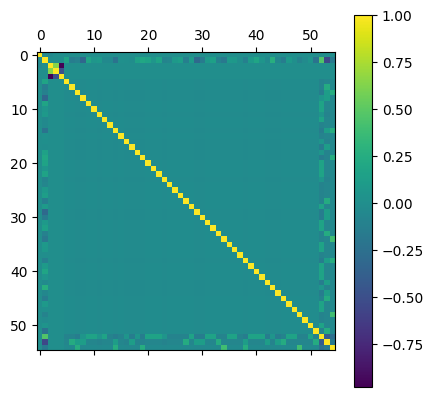

In [ ]:
plt.matshow(pd.get_dummies(food_rainppi, drop_first = True).corr())
cb = plt.colorbar()
plt.show()

In [ ]:
corr = pd.get_dummies(food_rainppi, drop_first = True).corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Precipitation(in),Food_Loss,Fruit_Grapes,Fruit_Oranges,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,TimeZone_US/Eastern,TimeZone_US/Mountain,TimeZone_US/Pacific
Year,1.000000,-0.021796,-0.043407,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
Precipitation(in),-0.021796,1.000000,0.000935,0.000000,-0.000000,0.178502,-0.140566,-0.113957,-0.318003,0.176283,0.060465,0.091839,-0.043893,-0.042607,-0.224776,0.016880,0.007573,-0.010683,0.155166,0.198519,0.166343,0.058421,0.166525,-0.086542,-0.069840,0.092365,0.132533,-0.124743,0.098474,-0.299768,-0.152745,0.089118,0.143037,-0.107080,-0.176951,0.087907,0.073332,-0.001033,-0.114087,0.102146,0.186714,0.053165,-0.032129,0.259417,-0.059892,-0.144239,0.079468,0.005823,-0.093285,-0.022346,0.043423,-0.223912,0.458642,-0.549447,-0.162149
Food_Loss,-0.043407,0.000935,1.000000,0.638759,-0.980386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
Fruit_Grapes,-0.000000,0.000000,0.638759,1.000000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000
Fruit_Oranges,0.000000,-0.000000,-0.980386,-0.500000,1.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
State_AR,-0.000000,0.178502,0.000000,0.000000,-0.000000,1.000000,-0.016129,-0.022996,-0.022996,-0.016129,-0.016129,-0.022996,-0.016129,-0.016129,-0.022996,-0.016129,-0.022996,-0.022996,-0.022996,-0.022996,-0.016129,-0.016129,-0.016129,-0.022996,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.022996,-0.022996,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.022996,-0.016129,-0.016129,-0.016129,-0.022996,-0.022996,-0.022996,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.016129,-0.096303,-0.067884,-0.041204
State_AZ,-0.000000,-0.140566,0.000000,0.000000,-0.000000,-0.016129,1.000000,-0.022996,-0.022996,-0.016129,-0.016129,-0.022996,-0.016129,-0.016129,-0.022996,-0.016129,-0.022996,-0.022996,-0.022996,-0.022996,-0.016129,-0.0

In [ ]:
# baseline model
avg_loss = food_rainppi['Food_Loss'].mean()

baseline_mse = np.mean((avg_loss - food_rainppi['Food_Loss']) ** 2)

print(f'Average Food Loss: {avg_loss}')
print(f'Baseline Accuracy (MSE): {baseline_mse}')

Average Food Loss: 0.5591518549187692
Baseline Accuracy (MSE): 0.04653716642067982


In [ ]:
#OLS 

loss_ols = sm.OLS(y, X)
results = loss_ols.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              Food_Loss   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              1217.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                        0.00
Time:                        21:06:27   Log-Likelihood:                          857.95
No. Observations:                 567   AIC:                                     -1610.
Df Residuals:                     514   BIC:                                     -1380.
Df Model:                          53                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
# linear regression

linreg_model = LinearRegression()
result = linreg_model.fit(X_train, y_train)

# make predictions
y_pred = linreg_model.predict(X_test)

# calculate accuracy
lin_acc = result.score(X_test, y_test)

print(f'LinReg Test Accuracy: {lin_acc}')
print(f"intercept: {result.intercept_}")
print(f"coefficients: {result.coef_}")

linreg_mse = mean_squared_error(y_test, y_pred)
rmse = linreg_mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {linreg_mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

LinReg Test Accuracy: 0.9889572607193504
intercept: 0.6459569231575819
coefficients: [ 0.00783014  0.00240642  0.01541243  0.01361381  0.016935    0.00435378
  0.01250941  0.00422459  0.00777362  0.01517922  0.01667816  0.00977074
  0.01387194  0.00344657  0.01483434  0.00717024  0.01423718  0.01153949
  0.00945234  0.01603237  0.01995008  0.00049887  0.00635974  0.01916497
  0.00939675  0.0162624   0.01675272  0.01110395 -0.00166739  0.01144193
  0.02016632  0.01569688  0.01175288  0.0152436   0.01658203  0.00964469
  0.0067113   0.00526859  0.01110772  0.0065473   0.00669741  0.00916395
  0.00960076  0.01880207  0.02232358  0.01220759  0.01295897  0.02060753
 -0.00181132 -0.00140031 -0.00241438  0.08927191 -0.40379144]
Mean Squared Error: 0.0005103249549238553
Root Mean Squared Error: 0.02259037305853658
Mean Absolute Error: 0.017857602679150077


In [ ]:
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 1, random_state=42)
elastic_net.fit(X_train, y_train)

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 0.8],
    'l1_ratio': [0, 0.3, 0.5, 0.7, 1]
}

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())
print("Best hyperparameters:", grid_search.best_params_)
best_elastic_net = grid_search.best_estimator_

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

y_pred = elastic_net.predict(X_test)

elasticnet_mse = mean_squared_error(y_test, y_pred)
rmse = elasticnet_mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {elasticnet_mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.001e-01, tolerance: 1.425e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.184e-01, tolerance: 1.391e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implem

In [ ]:
# decision tree/CART 
dtr = DecisionTreeRegressor(random_state = 42) 
dtr = dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
dtr_mse = mean_squared_error(y_test, y_pred_dtr)
print (f'Decision Tree MSE: {dtr_mse}')

Decision Tree MSE: 0.0011357265145281376


26


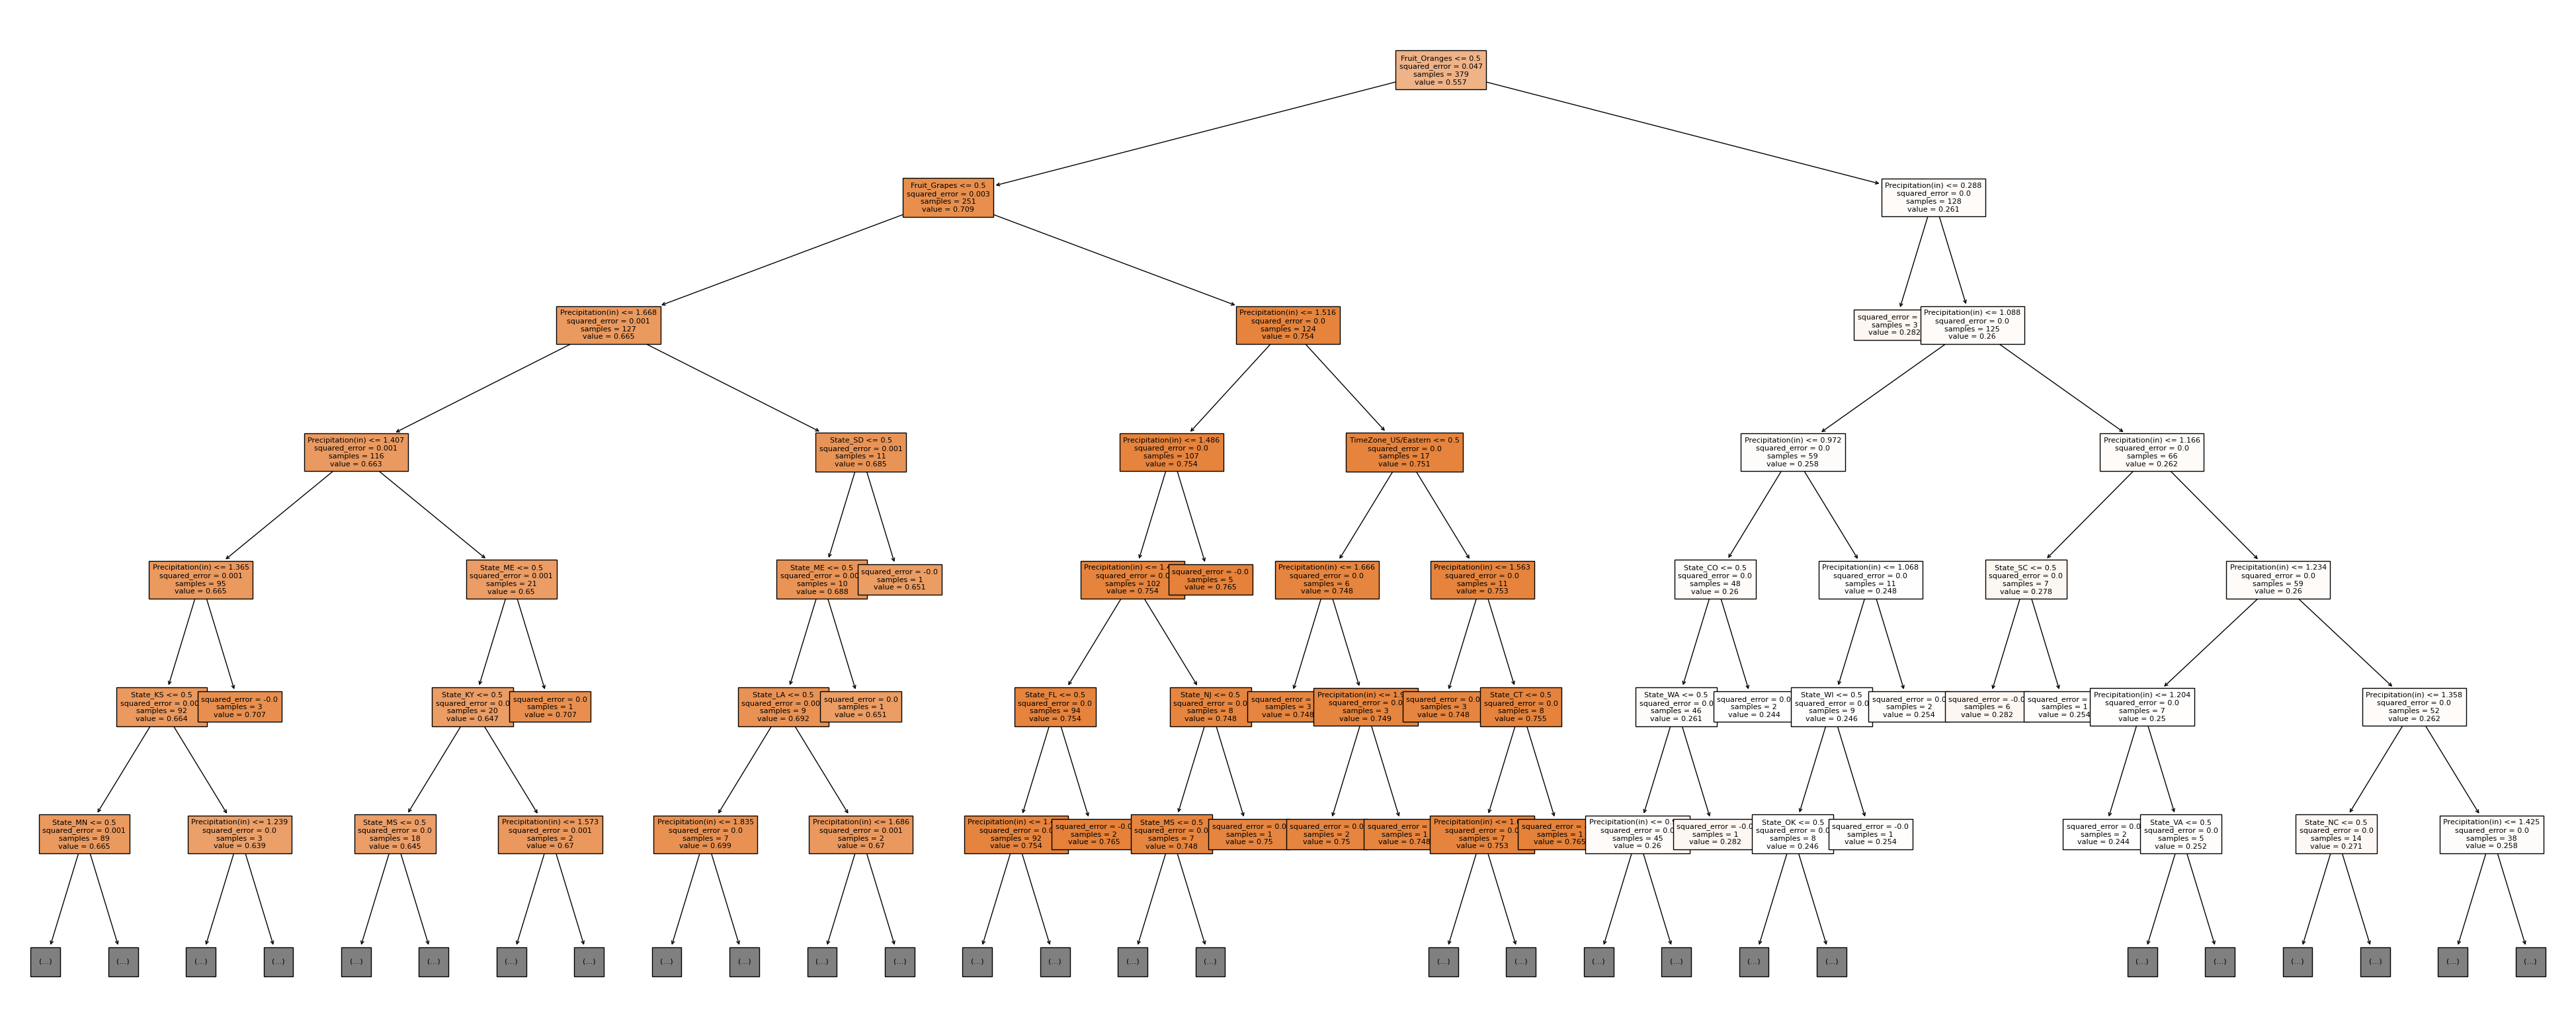

In [ ]:
# decision tree with CART visualization

dtr = tree.DecisionTreeRegressor(random_state=42)
dtr = dtr.fit(X_train, y_train)
fig = plt.figure(figsize=(50,20))
tree.plot_tree(dtr, 
          max_depth = 6,
          feature_names=X_train.columns, 
          filled=True,
          impurity=True,
          fontsize=8)

fig.savefig("cart_reg_tree_loss.png")
print(dtr.tree_.max_depth)

In [ ]:
# decision trees with cross validation

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 101)}

dtr = DecisionTreeRegressor(random_state=42)
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, cv=10, error_score ='raise').fit(X_train, y_train)
y_pred = dtr_cv.predict(X_test)

dtrcv_mse = mean_squared_error(y_test, y_pred)
print (f'Decision Tree MSE: {dtrcv_mse}')

Decision Tree MSE: 0.0004289076468948798


Node count = 5


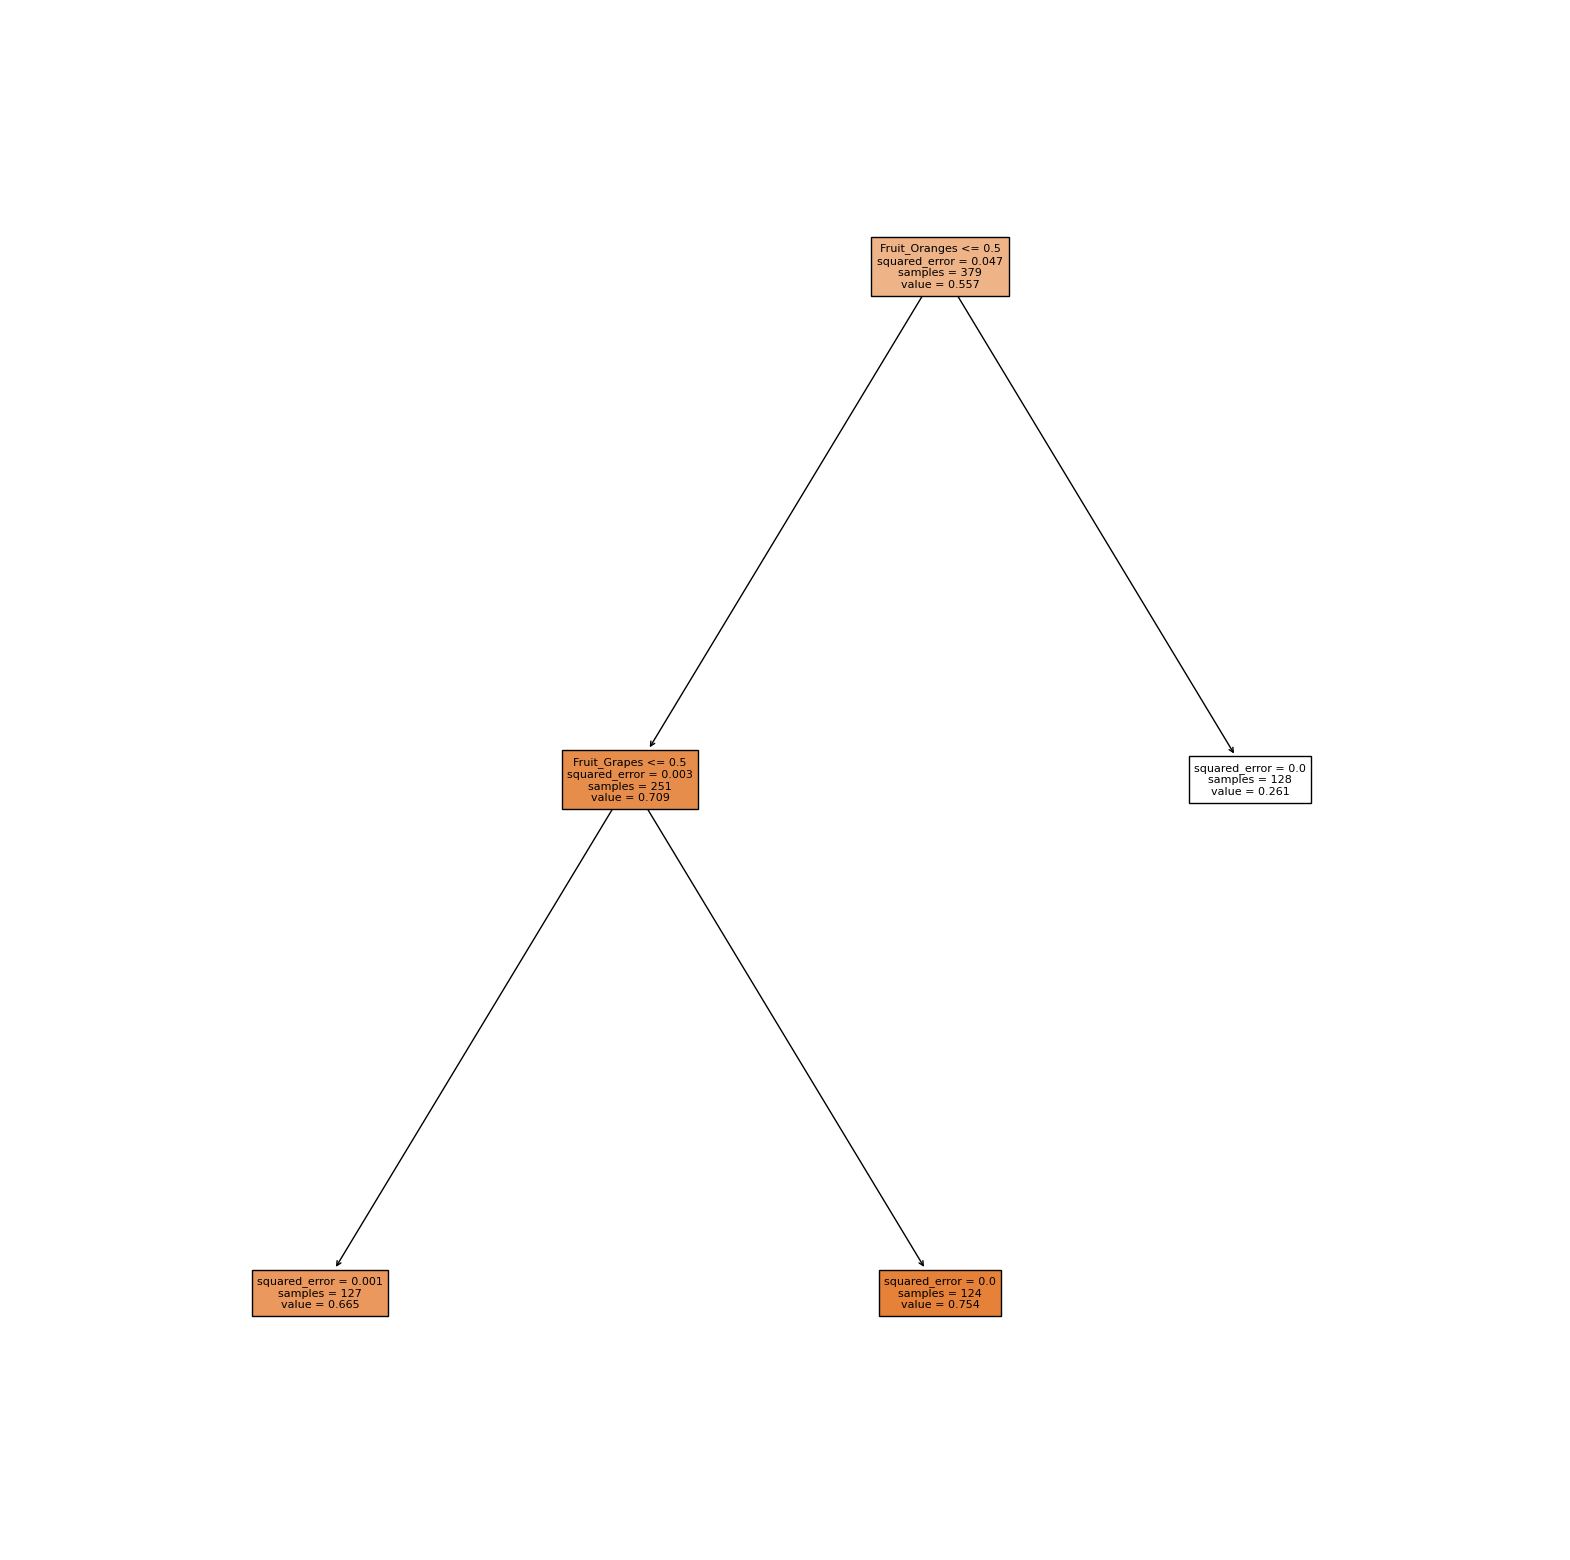

AttributeError: 'GridSearchCV' object has no attribute 'tree_'

In [ ]:
# decision tree with cv accuracy visualization

print('Node count =', dtr_cv.best_estimator_.tree_.node_count)
fig = plt.figure(figsize=(20, 20))
plot_tree(dtr_cv.best_estimator_, 
          feature_names=X_train.columns, 
          filled=True,
          impurity=True,
          fontsize=8,
          max_depth = 7) 
plt.show()

fig.savefig("cv_acc_reg_tree_loss.png")

In [ ]:
#random forest
rfr = RandomForestRegressor(random_state = 2023) 
fittedrfr = rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
print (f'Random Forest MSE: {rf_mse}')

Random Forest MSE: 0.0007252926266038501


In [ ]:
values = {
'Baseline Model':[baseline_mse],
'Logistic Regression':[linreg_mse],
'Decision Tree':[dtr_mse],
'Cross Validated Decision Tree':[dtrcv_mse],
'Random Forest': [rf_mse],
}
table = pd.DataFrame(values, index = ['Accuracy (MSE)'])
table

,Baseline Model,Logistic Regression,Decision Tree,Cross Validated Decision Tree,Random Forest
Accuracy (MSE),0.046537,0.00051,0.001136,0.000429,0.000725


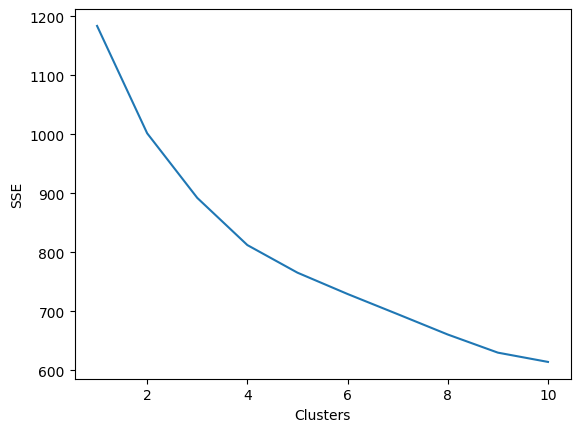

In [ ]:
from sklearn.cluster import KMeans

kmeans_inertias = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    k_means.fit(X)
    kmeans_inertias.append(k_means.inertia_)

#plot elbow curve
plt.plot(np.arange(1,11), kmeans_inertias)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

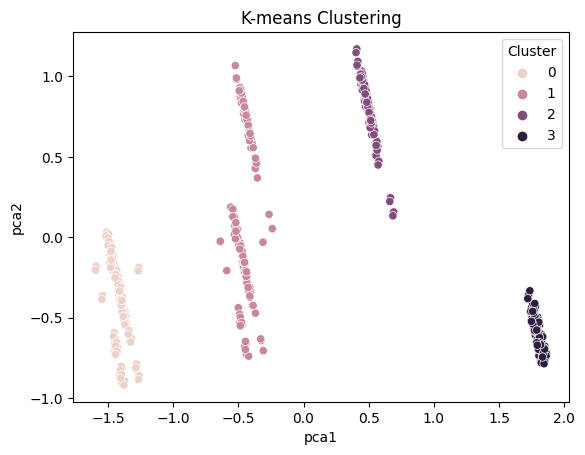

In [ ]:
clustering_kmeans = KMeans(n_clusters=4)
X['Cluster'] = clustering_kmeans.fit_predict(X)

reduced_data = PCA(n_components = 2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x = "pca1", y = "pca2", hue = X['Cluster'], data = results)
plt.title('K-means Clustering')
plt.show()

In [ ]:
X['Cluster'].value_counts()

0    158
1    148
2    138
3    123
Name: Cluster, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d4947f7f-a851-4759-86dc-ef6dfd94a02b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>